In [20]:
import numpy as np
import pandas as pd
import os
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_score,train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
from sklearn.metrics import confusion_matrix

#  1. Data Loading/ Processing

In [6]:
#load admission data 
data = pd.read_csv('data.csv') 

#print(data), shape
row = data.shape[0]
col = data.shape[1]
print('The data has shape of', row, 'rows','and ',col,'columns.','\n')

#check if there is any missing value
print(data.isnull().sum())

The data has shape of 500 rows and  9 columns. 

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64


In [7]:
#What I do in this cell is to seperate features and prediction value into X and Y, probably will be useful.....

#since 'Serial No.' is not a influencial feature in our data set, so we could remove it. and 'Chance of Adimit' is what
#prediction data, so its not a feature and we could remove it from feature columns
f_col_names=list(data.columns)
print(f_col_names)
f_col_names.remove('Serial No.')
f_col_names.remove('Chance of Admit ')
print(f_col_names)

#"Chance of Admit" is what we need to predict, so we store it as Y, and others are features and we store them into X
#X[0] is 'GRE Score'
#X[1] is 'TOEFL Score'
#X[3] is 'University Rating'
#X[4] is 'SOP'
#X[5] is 'LOR'
#X[6] is 'CGPA'
#X[7] is 'Research'
#Y[0] is 'Chance of Admit'
X = data[f_col_names].values
Y = data['Chance of Admit '].values
print('X shape: ',X.shape)
print('Y shape: ',Y.shape)

['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA', 'Research', 'Chance of Admit ']
['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA', 'Research']
X shape:  (500, 7)
Y shape:  (500,)


In [8]:
#since 'Serial No.' is not a influencial feature in our data set, so we could remove it.
data.drop('Serial No.', axis=1, inplace=True)
#We could Plot a heatmap to see the correlation of all the features compared to Chance to Admit

# 2. Data Analyzing

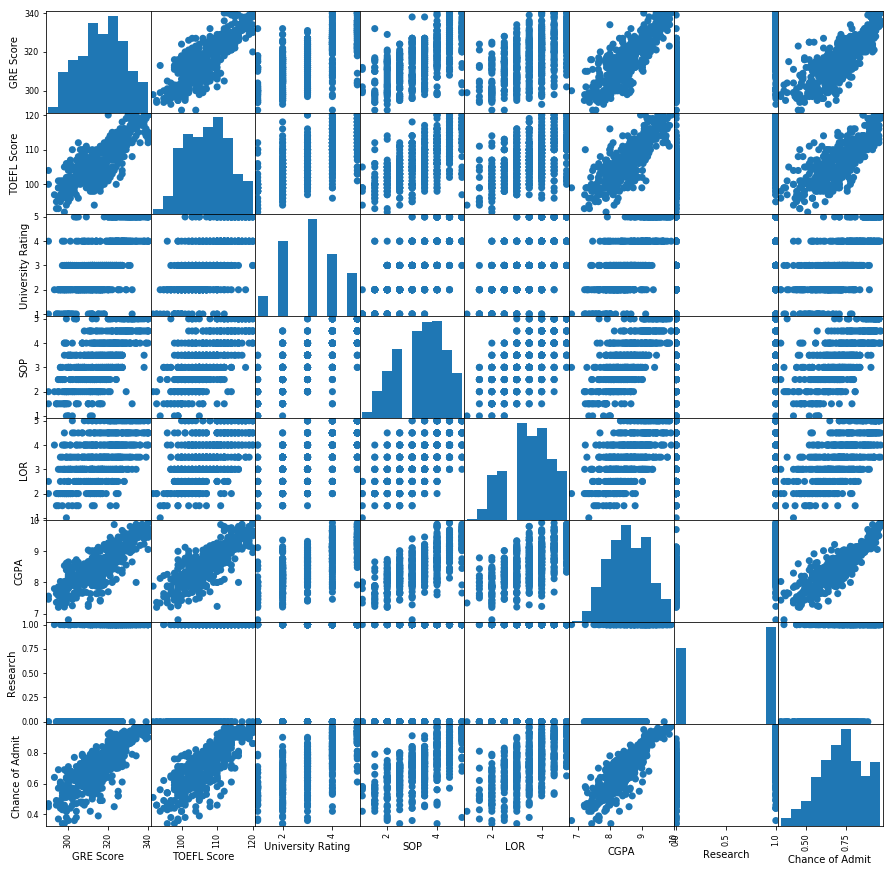

In [9]:
pd.plotting.scatter_matrix(data.loc[:, data.columns != 'Serial No.'], 
                           figsize= [15,15],
                           diagonal='hist',alpha=1,s = 200,marker = '.')
plt.show()

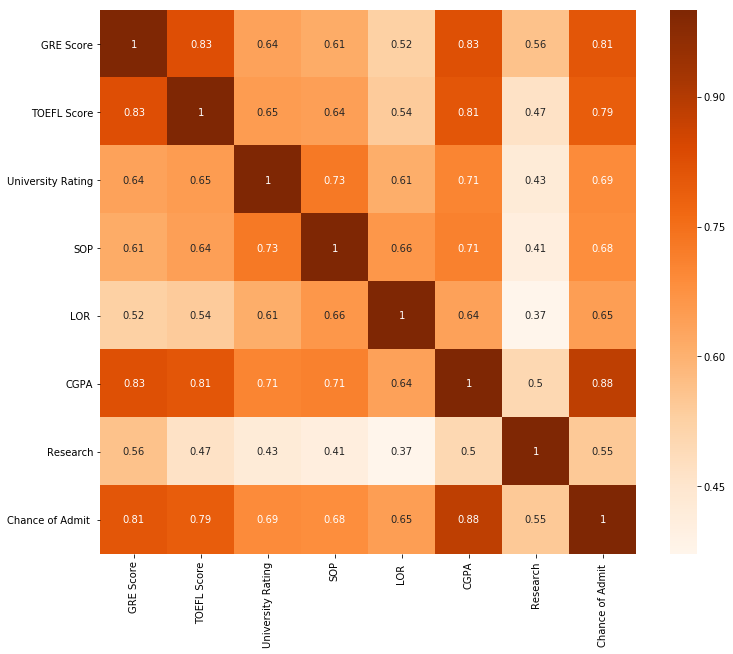

In [10]:
fig, ax = plt.subplots(figsize=(12,10))
sns.heatmap(data.corr(), annot=True, cmap='Oranges')
plt.show()

From the heapmap above, we could found that feature 'CGPA', 'GRE Score', 'TOEFL Score', and 'University Rating' are the top 4 feautures with most correlation value with prediction 'Chance of Admit'. We could do some furthermore analysis about these 3 features to better understanding the dataset, plus, we could also do some analysis about other feautures to have a more comprehensive cognition about the dataset.

C:\Users\ShiYu Qiu\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


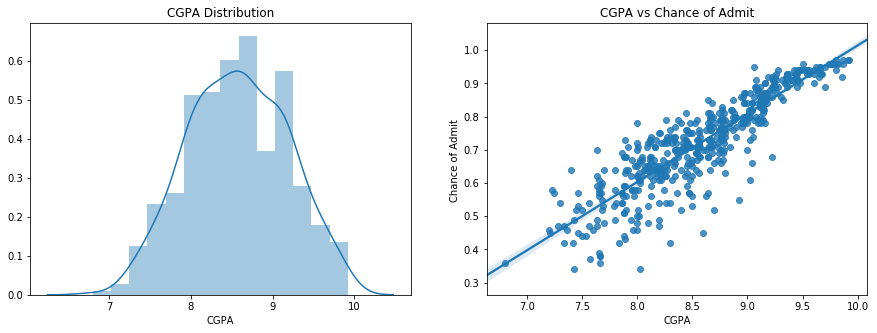

Mean CGPA Score is : 8.576440000000003


In [11]:
#For the top 3 correlated feeatures:

#1. The distribution of feature 'CGPA':
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.distplot(data['CGPA'])
plt.title('CGPA Distribution')

plt.subplot(1,2,2)
sns.regplot(data['CGPA'], data['Chance of Admit '])
plt.title('CGPA vs Chance of Admit')

plt.show()
print('Mean CGPA Score is :',data['CGPA'].mean())

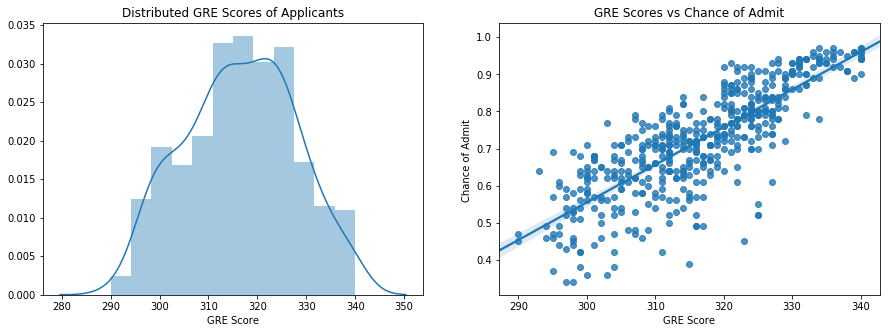

Mean GRE Score is : 316.472


In [12]:
#2. The distribution of GRE Scores:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.distplot(data['GRE Score'])
plt.title('Distributed GRE Scores of Applicants')

plt.subplot(1,2,2)
sns.regplot(data['GRE Score'], data['Chance of Admit '])
plt.title('GRE Scores vs Chance of Admit')

plt.show()
print('Mean GRE Score is :',data['GRE Score'].mean())

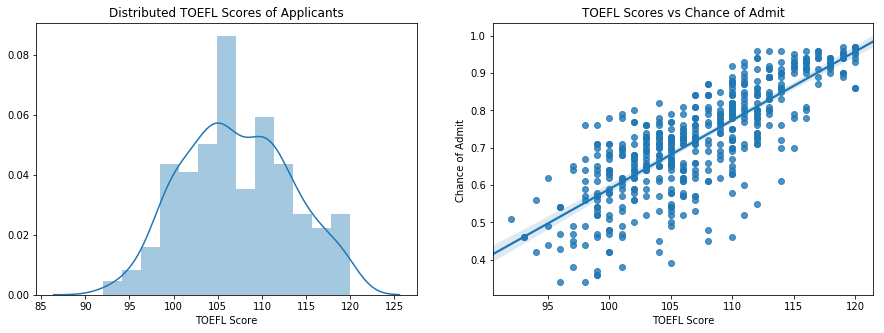

Mean GRE Score is : 107.192


In [13]:
#3. The distribution of TOEFL Scores:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.distplot(data['TOEFL Score'])
plt.title('Distributed TOEFL Scores of Applicants')

plt.subplot(1,2,2)
sns.regplot(data['TOEFL Score'], data['Chance of Admit '])
plt.title('TOEFL Scores vs Chance of Admit')

plt.show()
print('Mean GRE Score is :',data['TOEFL Score'].mean())

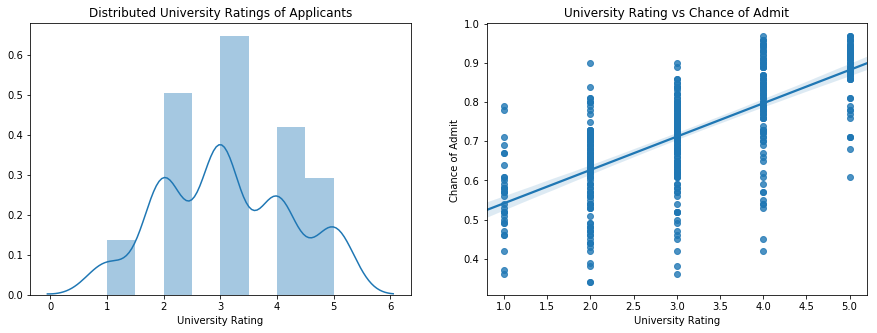

In [14]:
#4. The distribution of University Rating:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.distplot(data['University Rating'])
plt.title('Distributed University Ratings of Applicants')

plt.subplot(1,2,2)
sns.regplot(data['University Rating'], data['Chance of Admit '])
plt.title('University Rating vs Chance of Admit')

plt.show()

Total number of students 500
Students had Research: 280
Students didnt have Research: 220


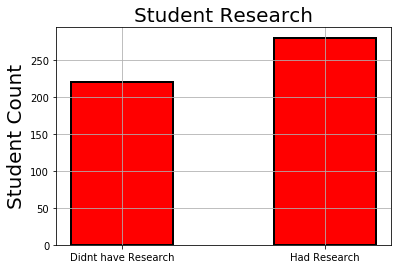

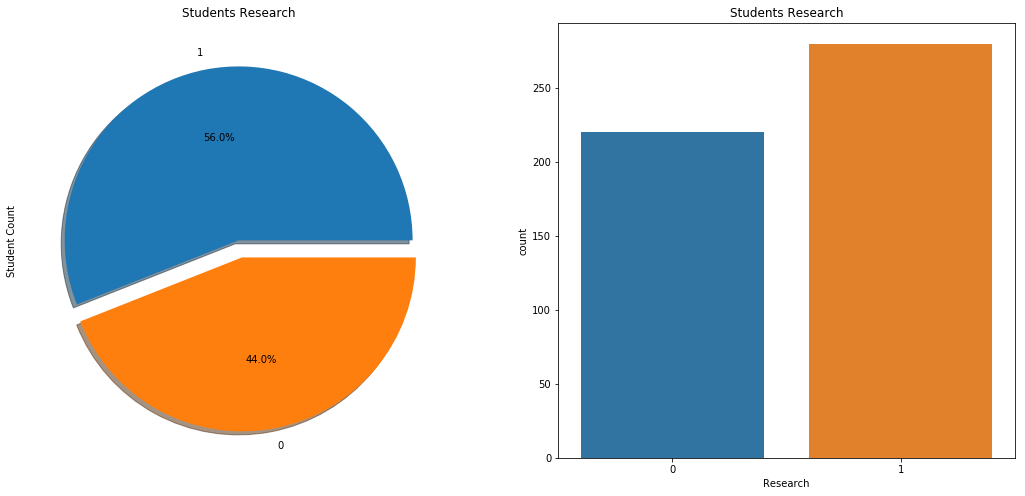

In [15]:
#For the feature of Research that students have:
had=len(data[data.Research==1])
no_had=len(data[data.Research==0])
print('Total number of students',had+no_had)
print('Students had Research:',had)
print('Students didnt have Research:',no_had)

y_r=np.array([len(data[data.Research==0]),len(data[data.Research==1])])
x_r=['Didnt have Research','Had Research']
ax=plt.bar(x_r,y_r,width=0.5,color='red',edgecolor='k',align='center',linewidth=2)
plt.ylabel('Student Count',fontsize=20)
plt.title('Student Research',fontsize=20)
plt.grid()
plt.ioff()
f,ax=plt.subplots(1,2,figsize=(18,8))
data['Research'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Students Research')
ax[0].set_ylabel('Student Count')
sns.countplot('Research',data = data,ax=ax[1])
ax[1].set_title('Students Research')

plt.show()

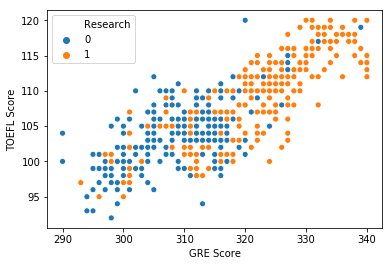

In [16]:
sns.scatterplot(data=data,x='GRE Score',y='TOEFL Score',hue='Research')
plt.show()

From the scatter plot above, it is reasonable to deduce that good students with high GRE Score and TOEFL Score would have higher chance or stronger will to do researches.  

If we set a threshold that the percentage of admission is above 0.75, the student would be securely admitted, and the percentage of admission is below 0.75, the student would not be surely admitted. Such that, the value of Admit=1 if Chance > 0.75 and Admit=0 if Chance < 0.75.

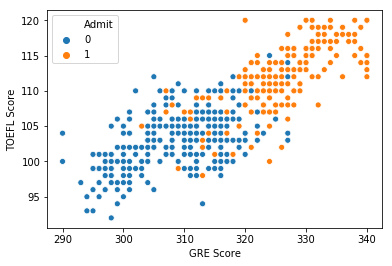

In [17]:
def modiffy(row):
    if row['Chance of Admit '] >0.75 :
        return 1
    else :
        return 0
data['Admit'] = data.apply(modiffy,axis=1)
admttemp = data.drop(['Chance of Admit '], axis=1)
#sns.pairplot(admttemp,hue='Admit')
sns.scatterplot(data=admttemp,x='GRE Score',y='TOEFL Score',hue='Admit')
del admttemp
plt.show()

From the scatter plot above, we could deduce that students with higher GRE Score and higher TOEFL Score would have higher chance to get admitted.

C:\Users\ShiYu Qiu\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


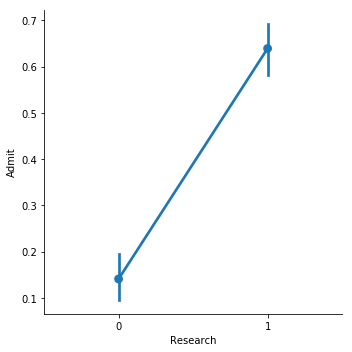

In [18]:
sns.factorplot('Research','Admit',data=data)
plt.show()

If we combine the 'Research' and 'Admit', we could get the result that the chance of getting admitted would increase if the students do reseaches.

# Models:

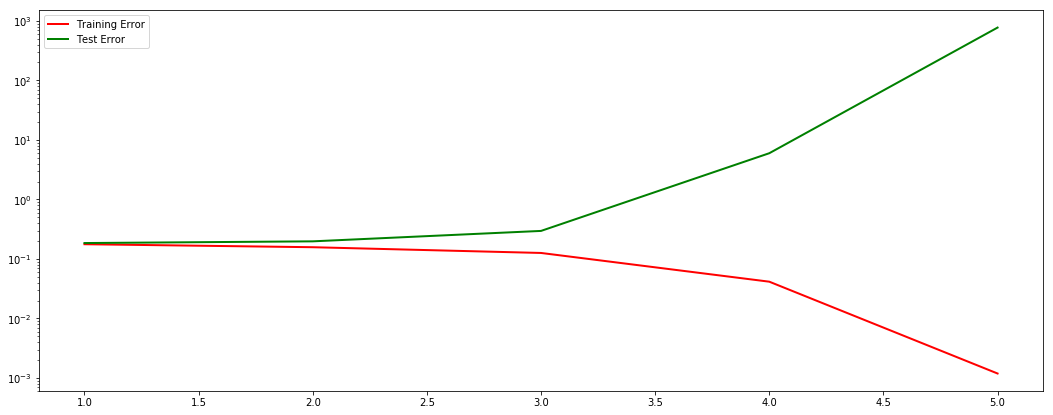

The mean accuracy for Logistic Regression model is: 0.72


C:\Users\ShiYu Qiu\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


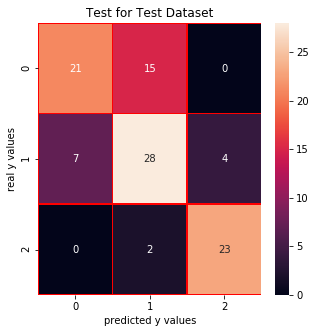

In [21]:
#1. Logistic Regression Classifier
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
scaler = StandardScaler().fit(X)
X_scaled = scaler.transform(X)
Xtr, Xte, Ytr, Yte = train_test_split(X, Y, test_size = 0.2, shuffle = True)
plt.rcParams['figure.figsize'] = (18.0, 7.0)
mse_test = []
mse_train = []
degree =[1,2,3,4,5]
for d in degree:
    
    poly = PolynomialFeatures(d, include_bias=False).fit(Xtr)
    XtrP = poly.transform(Xtr)
    poly = PolynomialFeatures(d, include_bias=False).fit(Xte)
    XteP = poly.transform(Xte)
    lr = LinearRegression().fit(XtrP, Ytr)
    mse_test.append(1-lr.score(XteP, Yte))
    mse_train.append(1-lr.score(XtrP, Ytr))
plt.semilogy(degree, mse_train, label = 'Training Error', linewidth = 2, c='r')
plt.semilogy(degree, mse_test, label = 'Test Error', linewidth = 2, c='g')
plt.legend()
plt.show()
lr = LinearRegression().fit(Xtr, Ytr)
lr.score(Xtr,Ytr)
Ytr_encoded = []
Yte_encoded = []
X_scaled = scaler.transform(X)
Xtr, Xte, Ytr, Yte = train_test_split(X, Y, test_size = 0.2, shuffle = False)

for label in Ytr:
    if label > 0.80:
        Ytr_encoded.append(2)
    elif label >= .66 and label <= .80:
        Ytr_encoded.append(1)
    else:
        Ytr_encoded.append(0)

for label in Yte:
    if label > 0.80:
        Yte_encoded.append(2)
    elif label >= .66 and label <= .80:
        Yte_encoded.append(1)
    else:
        Yte_encoded.append(0)
# Ytr_encoded = np.array(Ytr_encoded)
# Yte_encoded = np.array(Yte_encoded)


from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
from sklearn.datasets import load_iris
lrc = LogisticRegression(multi_class='multinomial', solver='lbfgs').fit(Xtr,Ytr_encoded)
print('The mean accuracy for Logistic Regression model is:', lrc.score(Xte, Yte_encoded))
Y_cpre = lrc.predict(Xte)
Y_cpre = lrc.predict(Xte)

cm_rc=confusion_matrix(Yte_encoded, Y_cpre)
f, ax = plt.subplots(figsize =(5,5))
sns.heatmap(cm_rc,annot = True,linewidths=0.5,linecolor="red",fmt = ".0f",ax=ax)
plt.title("Test for Test Dataset")
plt.xlabel("predicted y values")
plt.ylabel("real y values")
plt.show()

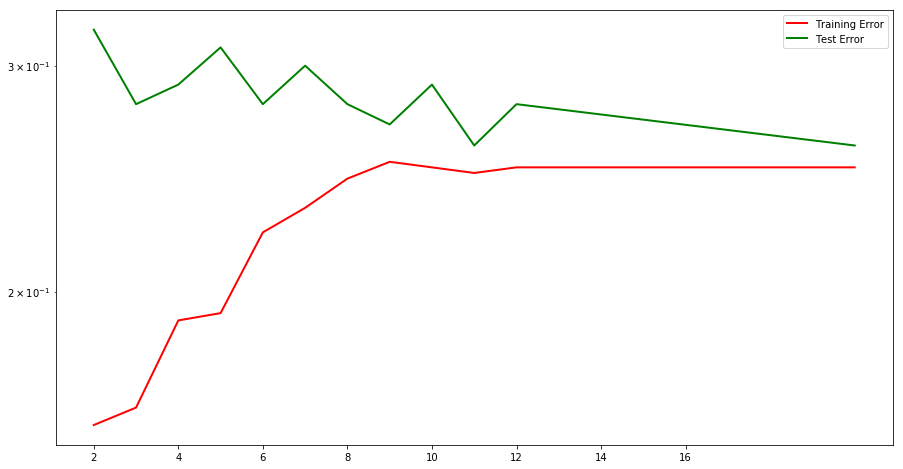

In [20]:
#2. K Nearest Neighbors Classifier
array_n = []
for each in Y:
    if each >= 0.80:
        array_n.append(2)
    elif each >= 0.66:
        array_n.append(1)
    else:
        array_n.append(0)
array_n = np.asarray(array_n)
Xtr, Xte, Ytr, Yte = train_test_split(X, array_n, test_size = 0.2, shuffle = False)

mse_test=[]
mse_train=[]

n=[2,3,4,5,6,7,8,9,10,11,12,20]
for i in n:
    model= KNeighborsClassifier(n_neighbors = i)
    model.fit(Xtr,Ytr)
    mse_test.append(1-model.score(Xte, Yte))
    mse_train.append(1-model.score(Xtr, Ytr))

plt.rcParams['figure.figsize'] = (15.0, 8.0)
plt.semilogy(n, mse_train, label = 'Training Error', linewidth = 2, c='r')
plt.semilogy(n, mse_test, label = 'Test Error', linewidth = 2, c='g')
plt.xticks([2,4,6,8,10,12,14,16])
plt.legend()
plt.show()

From the figure above, we could conclude that k = 11 is the best k value.

In [23]:
model=KNeighborsClassifier(n_neighbors = 11)
model.fit(Xtr,Ytr)

predictions = model.predict(Xte)
print('The score of Knn is : ',accuracy_score(Yte,predictions))

The score of Knn is :  0.74


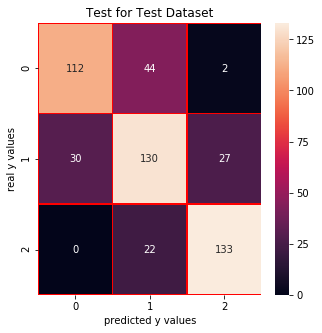

In [24]:
from sklearn.metrics import confusion_matrix
predictions = model.predict(X)
cm_knn = confusion_matrix(array_n,predictions)
f, ax = plt.subplots(figsize =(5,5))
sns.heatmap(cm_knn,annot = True,linewidths=0.5,linecolor="red",fmt = ".0f",ax=ax)
plt.title("Test for Test Dataset")
plt.xlabel("predicted y values")
plt.ylabel("real y values")
plt.show()


score of classifier with default parameter values: 0.81


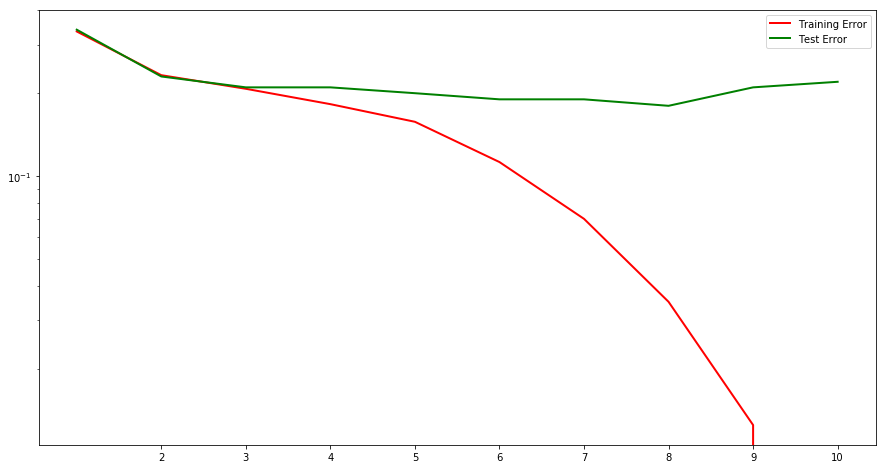

According to the graph, the optimal value for max_depth is: 8


In [22]:
#3. Random Forest
Y_class = []
for i in Y:
    if i>=0.8:
        Y_class.append("high") #high probability
    if 0.66<i<0.8:
        Y_class.append("medium") #medium probability
    if i<=0.66:
        Y_class.append("low") #low probability
X_ctr, X_cte, Y_ctr, Y_cte = train_test_split(X, Y_class, test_size = 0.2, shuffle = False)

clf = RandomForestClassifier(n_estimators=100, max_depth=7,min_samples_split=2, random_state=0)
clf.fit(X_ctr, Y_ctr)
print("score of classifier with default parameter values:",clf.score(X_cte, Y_cte))
depth = [1,2,3,4,5,6,7,8,9,10]
mse_test = []
mse_train = []

mse_ctest = []
mse_ctrain = []
for d in depth:
    clf = RandomForestClassifier(n_estimators=100, max_depth=d, random_state=0, min_samples_split=2)
    clf.fit(X_ctr, Y_ctr)
    mse_ctest.append(1-clf.score(X_cte, Y_cte))
    mse_ctrain.append(1-clf.score(X_ctr, Y_ctr))

plt.rcParams['figure.figsize'] = (15.0, 8.0)
plt.semilogy(depth, mse_ctrain, label = 'Training Error', linewidth = 2, c='r')
plt.semilogy(depth, mse_ctest, label = 'Test Error', linewidth = 2, c='g')
plt.xticks([2,3,4,5,6,7,8,9,10])
plt.legend()
plt.show()
print("According to the graph, the optimal value for max_depth is: 8") ##########!!!!

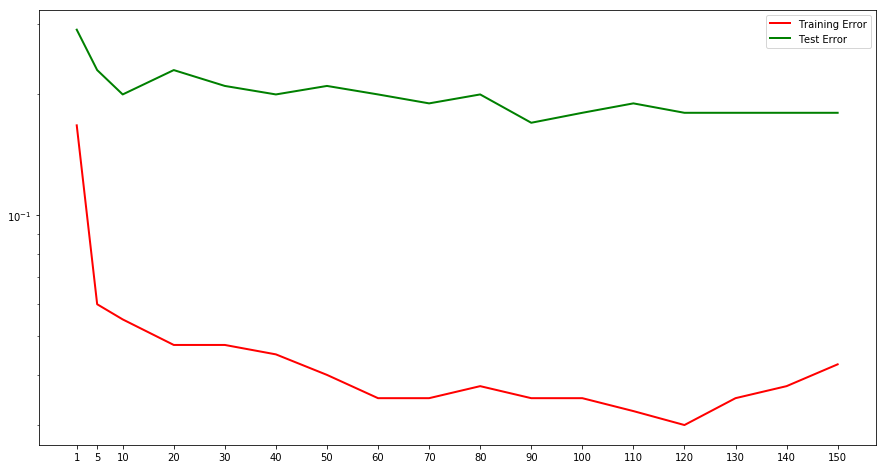

According to the graph, the optimal value for n_estimators is: 90


In [23]:
n_estimators = [1,5,10,20,30,40,50,60,70,80,90,100,110,120,130,140,150]
mse_test = []
mse_train = []

mse_ctest = []
mse_ctrain = []
for n in n_estimators:
    clf = RandomForestClassifier(n_estimators=n, max_depth=8, random_state=0, min_samples_split=2)
    clf.fit(X_ctr, Y_ctr)
    mse_ctest.append(1-clf.score(X_cte, Y_cte))
    mse_ctrain.append(1-clf.score(X_ctr, Y_ctr))
    
plt.rcParams['figure.figsize'] = (15.0, 8.0)
plt.semilogy(n_estimators, mse_ctrain, label = 'Training Error', linewidth = 2, c='r')
plt.semilogy(n_estimators, mse_ctest, label = 'Test Error', linewidth = 2, c='g')
plt.xticks([1,5,10,20,30,40,50,60,70,80,90,100,110,120,130,140,150])
plt.legend()
plt.show()
print("According to the graph, the optimal value for n_estimators is: 90")

In [24]:
final_clf = RandomForestClassifier(max_depth = 8, random_state = 0, n_estimators = 90, min_samples_split=2)
final_clf.fit(X_ctr, Y_ctr)
print("score of classifier with optimal parameter values:",final_clf.score(X_cte,Y_cte))

score of classifier with optimal parameter values: 0.83


[[25  2  0]
 [ 4 24  7]
 [ 0  4 34]]


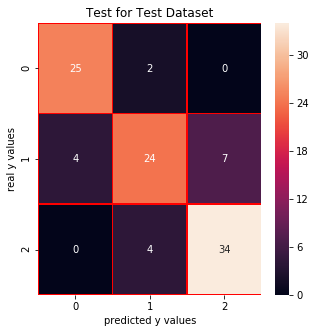

In [25]:
Y_cpre = final_clf.predict(X_cte)
cm_rc=confusion_matrix(Y_cte, Y_cpre, labels=["high", "medium", "low"])
print(cm_rc)
f, ax = plt.subplots(figsize =(5,5))
sns.heatmap(cm_rc,annot = True,linewidths=0.5,linecolor="red",fmt = ".0f",ax=ax)
plt.title("Test for Test Dataset")
plt.xlabel("predicted y values")
plt.ylabel("real y values")
plt.show()

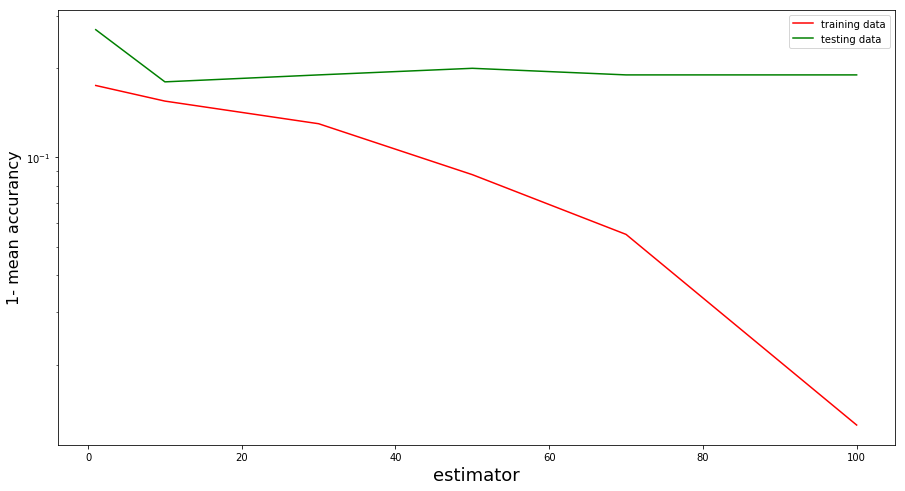

The estimator is 10


In [41]:
#4.Gradient Boosting
array_n = []
for each in Y:
    if each >= 0.80:
        array_n.append(2)
    elif each >= 0.66:
        array_n.append(1)
    else:
        array_n.append(0)
Y_encoded = np.array(array_n)
Xtr, Xte, Ytr, Yte = train_test_split(X, Y_encoded, test_size = 0.2, shuffle = False)

depth_list = [10,30,50,80,110]
n_estimator_list = [1,10,30,50,70,100]
mse_test = []
mse_train = []

for estimator in n_estimator_list:
    model = GradientBoostingClassifier(max_depth = 3, n_estimators = estimator)
    model.fit(Xtr,Ytr)
    
    mse_test.append(1-model.score(Xte,Yte))
    mse_train.append(1-model.score(Xtr,Ytr))


plt.rcParams['figure.figsize'] = (15.0, 8.0)
plt.xlabel('estimator', fontsize=18)
plt.ylabel('1- mean accurancy', fontsize=16)
plt.semilogy(n_estimator_list, mse_train, c='r', label="training data")
plt.semilogy(n_estimator_list, mse_test, c='g', label="testing data")
plt.legend()
plt.show()
print("The estimator is 10")


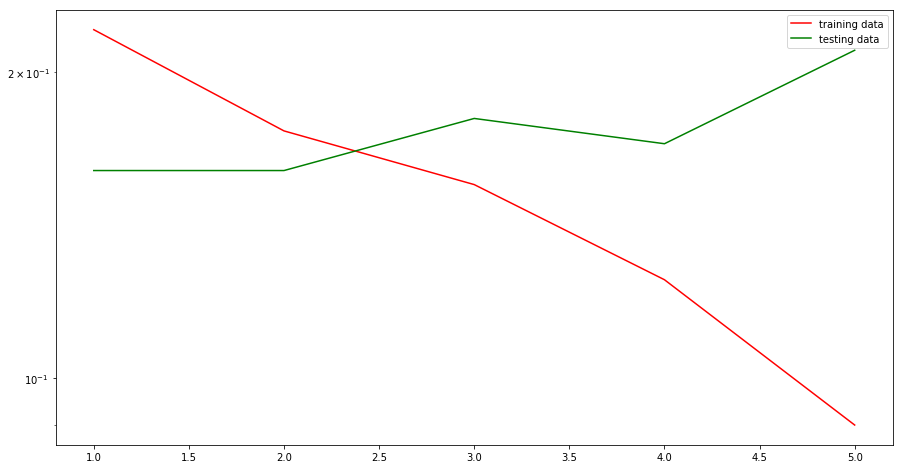

the max_depth is 2


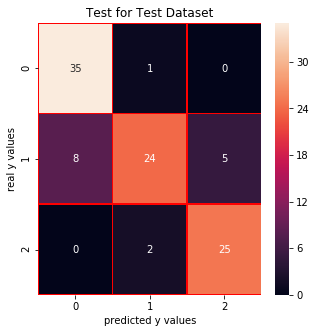

The score for is GradientBoostingClassifier: 0.84


In [42]:
depth_list = [1,2,3,4,5]
mse_test = []
mse_train = []

for depth in depth_list:
    model = GradientBoostingClassifier(max_depth = depth, n_estimators = 10)
    model.fit(Xtr,Ytr)
    
    mse_test.append(1-model.score(Xte,Yte))
    mse_train.append(1-model.score(Xtr,Ytr))
    
plt.rcParams['figure.figsize'] = (15.0, 8.0)
plt.semilogy(depth_list, mse_train, c='r', label="training data")
plt.semilogy(depth_list, mse_test, c='g', label="testing data")
plt.legend()
plt.show()

print("the max_depth is 2")


from sklearn.metrics import confusion_matrix
model = GradientBoostingClassifier(max_depth = 2, n_estimators = 10)
model.fit(Xtr,Ytr)
ytesting_prediction = model.predict(Xte)

cm_knn = confusion_matrix(Yte,ytesting_prediction)
f, ax = plt.subplots(figsize =(5,5))
sns.heatmap(cm_knn,annot = True,linewidths=0.5,linecolor="red",fmt = ".0f",ax=ax)
plt.title("Test for Test Dataset")
plt.xlabel("predicted y values")
plt.ylabel("real y values")
plt.show()

print("The score for is GradientBoostingClassifier: "+str(model.score(Xte,Yte)))